# Report

The goal is to identify which features are important and influence the buying intent of customers. There are 3 sets of feature and 2 models are trained on each set. The tree based model(Gradient boosted trees) will be used to determine feature importance. The model with the highest Balanced accuracy score will be selected. The neural netwrok based mode serves as reference for how good the tree based model is. Ideally the performance between the two models should be equal. 


## Model selection

The hyper parameter for each model is optimized using bayesian optimization and 5 fold  stratified Cross Validation. Each model is trained on there different transformations of the original dataset. Since the data set is imbalanced be use balanced accuracy as the metric.

### Optimization and selection for gradient boosted trees

In [1]:
# imports
import lightgbm as lgb #light gradient boosted tree
from sklearn.model_selection import train_test_split, StratifiedKFold # train and test split
from sklearn.metrics import balanced_accuracy_score,precision_score# metrics
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK# optimization
import numpy as np
import pandas as pd # reading data
import warnings
warnings.simplefilter("ignore")

In [2]:
# read data
df_encoded = pd.read_csv('C:\ProgramData\jupyter\MLonline_shoppers_intention_encoded.csv', index_col=False)
df_scaled = pd.read_csv('C:\ProgramData\jupyter\MLonline_shoppers_intention_encoded_scaled.csv', index_col=False)
df_transformed = pd.read_csv('C:\ProgramData\jupyter\MLonline_shoppers_intention_encoded_scaled_transformed.csv', index_col=False)

In [3]:
#seperate label
label = df_encoded.pop('Revenue').astype('int')
_,_ = df_scaled.pop('Revenue'),df_transformed.pop('Revenue')

In [4]:
#split object for CV 
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)
#Hyperparameter search space for gradient boosed trees
lgb_space = {'lr':hp.loguniform('lr',-6.9,-2.3),'num_leaves':hp.quniform('num_leaves',15,255,1),
         'max_depth':hp.choice('max_depth',[-1,9,12]),'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0)}

In [5]:
def lgb_optimizer(params):
    '''A function to optimize  lgb classifier
    :params:=params , dictionary containing the Hyper-parameters for the classifier
    returns true loss and validation loss
    '''
    if 'num_leaves' in params:
        params['num_leaves']=int(params['num_leaves'])
    if 'max_depth' in params:
        params['max_depth']=int(params['max_depth'])
    val_score=[]
    true_scores=[]
    rd=1
    for train_index, test_index in skf.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[test_index]
        clf = lgb.LGBMClassifier(n_estimators=2000,**params)
        clf.fit(X_tr,y_tr,eval_set=(X_val,y_val),early_stopping_rounds =200,eval_metric='logloss',verbose=False)
        y_pred = clf.predict(X_val)
        y_tr_pred=clf.predict(X_tr)
        score=balanced_accuracy_score(y_val,y_pred,)
        true_score=balanced_accuracy_score(y_tr,y_tr_pred)
        val_score.append(score)
        true_scores.append(true_score)
        rd+=1
    mean,std =np.mean(val_score),np.std(val_score)
    true_mean=np.mean(true_scores)
    print("mean: {}, Std: {}".format(mean,std))
    return {'loss':-mean,'status': STATUS_OK,'true_loss':-true_mean}

In [40]:
#split into train and test and call the fmin(optimizer) function for encoded dataset
X_train,X_test,y_train,y_test = train_test_split(df_encoded,label,test_size=0.2,random_state=42)
trials_encoded = Trials()
best_e= fmin(lgb_optimizer,lgb_space, algo=tpe.suggest, max_evals=20, trials=trials_encoded)

[LightGBM] [Warning] Unknown parameter: lr            
[LightGBM] [Warning] Unknown parameter: lr            
[LightGBM] [Warning] Unknown parameter: lr            
[LightGBM] [Warning] Unknown parameter: lr            
[LightGBM] [Warning] Unknown parameter: lr            
mean: 0.7764680735662856, Std: 0.0236396526953442     
[LightGBM] [Warning] Unknown parameter: lr                                       
[LightGBM] [Warning] Unknown parameter: lr                                       
[LightGBM] [Warning] Unknown parameter: lr                                       
[LightGBM] [Warning] Unknown parameter: lr                                       
[LightGBM] [Warning] Unknown parameter: lr                                       
mean: 0.7626044987905238, Std: 0.01555192697691381                               
[LightGBM] [Warning] Unknown parameter: lr                                       
[LightGBM] [Warning] Unknown parameter: lr                                       
[LightGBM] [Wa

mean: 0.7744203773470119, Std: 0.006761150330318436                               
[LightGBM] [Warning] Unknown parameter: lr                                        
[LightGBM] [Warning] Unknown parameter: lr                                        
[LightGBM] [Warning] Unknown parameter: lr                                        
[LightGBM] [Warning] Unknown parameter: lr                                        
[LightGBM] [Warning] Unknown parameter: lr                                        
mean: 0.76945717863206, Std: 0.009082270032121219                                 
[LightGBM] [Warning] Unknown parameter: lr                                        
[LightGBM] [Warning] Unknown parameter: lr                                        
[LightGBM] [Warning] Unknown parameter: lr                                        
[LightGBM] [Warning] Unknown parameter: lr                                        
[LightGBM] [Warning] Unknown parameter: lr                                        
mean

In [41]:
#for scaled dataset
X_train,X_test,y_train,y_test = train_test_split(df_scaled,label,test_size=0.2,random_state=42)
trials_scaled = Trials()
best_scaled = fmin(lgb_optimizer, lgb_space, algo=tpe.suggest, max_evals=20, trials=trials_scaled)

[LightGBM] [Warning] Unknown parameter: lr            
[LightGBM] [Warning] Unknown parameter: lr            
[LightGBM] [Warning] Unknown parameter: lr            
[LightGBM] [Warning] Unknown parameter: lr            
[LightGBM] [Warning] Unknown parameter: lr            
mean: 0.7668066115402962, Std: 0.019546678518791404   
[LightGBM] [Warning] Unknown parameter: lr                                       
[LightGBM] [Warning] Unknown parameter: lr                                       
[LightGBM] [Warning] Unknown parameter: lr                                       
[LightGBM] [Warning] Unknown parameter: lr                                       
[LightGBM] [Warning] Unknown parameter: lr                                       
mean: 0.7545376685842452, Std: 0.010805061382305074                              
[LightGBM] [Warning] Unknown parameter: lr                                       
[LightGBM] [Warning] Unknown parameter: lr                                       
[LightGBM] [Wa

mean: 0.7521249187970215, Std: 0.01823338006380702                                
[LightGBM] [Warning] Unknown parameter: lr                                        
[LightGBM] [Warning] Unknown parameter: lr                                        
[LightGBM] [Warning] Unknown parameter: lr                                        
[LightGBM] [Warning] Unknown parameter: lr                                        
[LightGBM] [Warning] Unknown parameter: lr                                        
mean: 0.7549596809762824, Std: 0.02486962727455921                                
[LightGBM] [Warning] Unknown parameter: lr                                        
[LightGBM] [Warning] Unknown parameter: lr                                        
[LightGBM] [Warning] Unknown parameter: lr                                        
[LightGBM] [Warning] Unknown parameter: lr                                        
[LightGBM] [Warning] Unknown parameter: lr                                        
mean

In [42]:
#for transformed dataset
X_train,X_test,y_train,y_test = train_test_split(df_transformed,label,test_size=0.2,random_state=42)
trials_transformed = Trials()
best_transformed = fmin(lgb_optimizer, lgb_space, algo=tpe.suggest, max_evals=20, trials=trials_transformed)

[LightGBM] [Warning] Unknown parameter: lr            
[LightGBM] [Warning] Unknown parameter: lr            
[LightGBM] [Warning] Unknown parameter: lr            
[LightGBM] [Warning] Unknown parameter: lr            
[LightGBM] [Warning] Unknown parameter: lr            
mean: 0.7639349999640188, Std: 0.005627554345616986   
[LightGBM] [Warning] Unknown parameter: lr                                       
[LightGBM] [Warning] Unknown parameter: lr                                       
[LightGBM] [Warning] Unknown parameter: lr                                       
[LightGBM] [Warning] Unknown parameter: lr                                       
[LightGBM] [Warning] Unknown parameter: lr                                       
mean: 0.7729716317298517, Std: 0.008072914866857807                              
[LightGBM] [Warning] Unknown parameter: lr                                       
[LightGBM] [Warning] Unknown parameter: lr                                       
[LightGBM] [Wa

mean: 0.7484345080857782, Std: 0.018874990851088205                               
[LightGBM] [Warning] Unknown parameter: lr                                        
[LightGBM] [Warning] Unknown parameter: lr                                        
[LightGBM] [Warning] Unknown parameter: lr                                        
[LightGBM] [Warning] Unknown parameter: lr                                        
[LightGBM] [Warning] Unknown parameter: lr                                        
mean: 0.7745083542370449, Std: 0.015271333048149644                               
[LightGBM] [Warning] Unknown parameter: lr                                        
[LightGBM] [Warning] Unknown parameter: lr                                        
[LightGBM] [Warning] Unknown parameter: lr                                        
[LightGBM] [Warning] Unknown parameter: lr                                        
[LightGBM] [Warning] Unknown parameter: lr                                        
mean

In [43]:
def model_trainer(Data,label,params,classifier='lgb',test_size=0.2):
    '''A function to train a model. 
    parameters:
    Data :=pandas dataset or numpy array of features
    label:=pandas dataset or numpy array of labels for features 
    params:=python dict parametes for the model
    model:=keras model object or sklearn classifier object
    test_size:=Float (0,1) fraction for test split
    return
    model:=str 'keras','lgb'
    train_score:=float balanced accuracy train score
    test_score:=float balanced accuracy test score
    returns-trained model,train_score,test_score
    '''
    X_train,X_test,y_train,y_test = train_test_split(Data,label,test_size=test_size,random_state=42)
    if classifier=='lgb':
        if 'num_leaves' in params:
            params['num_leaves']=int(params['num_leaves'])
        if 'max_depth' in params:
            #max_depth=[-1,9,12]#max_depth choice list
            params['max_depth']=-1#int(params['max_depth'])#best returns an index corresponding the choice
        clf = lgb.LGBMClassifier(n_estimators=5000,**params)
        clf.fit(X_train,y_train,eval_set=(X_test,y_test),early_stopping_rounds =200,eval_metric='auc',verbose=False)
        train_pred=clf.predict(X_train)
        test_pred=clf.predict(X_test)
    elif classifier=='keras':
        opt=['adam','sgd']
        if 'optimizer' in params:
            params['optimizer'] =opt[params['optimizer']]
        clf = model(feature_size=X_train.shape[-1],**params)
        clf.fit(X_train,y_train,epochs=20,batch_size=128,verbose=0)
        train_pred=np.round(clf.predict(X_train))
        test_pred=np.round(clf.predict(X_test))
    train_score = balanced_accuracy_score(train_pred,y_train)
    test_score= balanced_accuracy_score(test_pred,y_test)
    return clf,train_score,test_score
        
    

In [44]:
print(best_e)
print(best_scaled)
print(best_transformed)

{'colsample_bytree': 0.7033881480691744, 'lr': 0.004000614603230111, 'max_depth': 2, 'num_leaves': 24.0}
{'colsample_bytree': 0.6918580761158839, 'lr': 0.004405814996467774, 'max_depth': 0, 'num_leaves': 27.0}
{'colsample_bytree': 0.797335768283457, 'lr': 0.0010849891457832665, 'max_depth': 2, 'num_leaves': 19.0}


In [45]:
clf_encoded,lgb_train_encoded,lgb_test_encoded=model_trainer(df_encoded,label,best_e)
clf_scaled,lgb_train_scaled,lgb_test_scaled=model_trainer(df_scaled,label,best_scaled)
clf_transformed,lgb_train_transformed,lgb_test_transformed=model_trainer(df_transformed,label,best_transformed)

[LightGBM] [Warning] Unknown parameter: lr
[LightGBM] [Warning] Unknown parameter: lr
[LightGBM] [Warning] Unknown parameter: lr


In [46]:
print("results")
print("| Dataset Type | Train Score | Test Score |")
print("| Encoded      | {:2f}       | {:2f}     |".format(lgb_train_encoded,lgb_test_encoded))
print("| Scaled       | {:2f}       | {:2f}     |".format(lgb_train_scaled,lgb_test_scaled))
print("| Transformed  | {:2f}       | {:2f}     |".format(lgb_train_scaled,lgb_test_scaled))

results
| Dataset Type | Train Score | Test Score |
| Encoded      | 0.890587       | 0.826378     |
| Scaled       | 0.896331       | 0.823374     |
| Transformed  | 0.896331       | 0.823374     |


### optimization and selection for neural network

In [50]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping

In [51]:
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=True)

In [52]:
def model(feature_size,lr=0.1,optimizer='adam',hl_size=128):
    ''' function to define keras model
    :feature:=
    '''
    if optimizer=='adam':
        opt =Adam(lr=lr)
    elif optimizer=='sgd':
        opt = SGD(lr=lr)
    hl_size=int(hl_size)
    model =Sequential()
    model.add(Dense(hl_size,activation='relu',input_shape=(feature_size,)))
    model.add(Dropout(0.25))
    model.add(Dense(hl_size,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['acc'])
    return model
    

In [53]:
def keras_optimizer(params):
    val_score=[]
    true_scores=[]
    rd=1
    for train_index, test_index in skf.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_index], X_train.iloc[test_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[test_index]
        nn_model = model(X_train.shape[1],**params)
        cb = EarlyStopping(monitor='val_acc',min_delta=0.001,patience=3)
        nn_model.fit(X_tr,y_tr,validation_data=(X_val,y_val),batch_size=128,callbacks=[cb],epochs=50,verbose=0)
        #_,score= nn_model.evaluate(X_val,y_val)
        #_,true_score=nn_model.evaluate(X_tr,y_tr)
        cv_pred = np.round(nn_model.predict(X_val))
        score=balanced_accuracy_score(y_val,cv_pred)
        y_tr_pred = np.round(nn_model.predict(X_tr))
        true_score=balanced_accuracy_score(y_tr,y_tr_pred)
        
        val_score.append(score)
        true_scores.append(true_score)
        rd+=1
    mean,std =np.mean(val_score),np.std(val_score)
    true_mean=np.mean(true_scores)
    print("mean: {}, Std: {}".format(mean,std))
    return {'loss':-mean,'status': STATUS_OK,'true_loss':-true_mean}

In [54]:
keras_space = {'lr':hp.loguniform('lr',-10,-2.3),'optimizer':hp.choice('optimizer',['adam','sgd'])}

In [64]:
X_train,X_test,y_train,y_test = train_test_split(df_encoded,label,test_size=0.2,random_state=42)
best_nn_encoded=fmin(keras_optimizer,keras_space,algo=tpe.suggest,max_evals=10)

mean: 0.6238281174492538, Std: 0.028358617186617124   
mean: 0.6140643929209305, Std: 0.06735836654842824                               
mean: 0.5414282784528608, Std: 0.04166983124975877                               
mean: 0.6608013203940895, Std: 0.059527634903741466                              
mean: 0.5021976880321901, Std: 0.0036177008265222735                             
mean: 0.6224693625342601, Std: 0.055599443407740284                              
mean: 0.7168353334014076, Std: 0.0826538098521615                                
mean: 0.5962687024129277, Std: 0.034964665011172166                              
mean: 0.5173394165381057, Std: 0.01582021688979241                               
mean: 0.6688130752270489, Std: 0.06231671106296116                               
100%|██████████| 10/10 [01:31<00:00,  9.12s/trial, best loss: -0.7168353334014076]


In [65]:
X_train,X_test,y_train,y_test = train_test_split(df_scaled,label,test_size=0.2,random_state=42)
best_nn_scaled=fmin(keras_optimizer,keras_space,algo=tpe.suggest,max_evals=10)

mean: 0.5852238499300768, Std: 0.10466546574506218    
mean: 0.5921190766870932, Std: 0.07679116035236659                               
mean: 0.49997602522146706, Std: 0.0007183148439303354                            
mean: 0.4997011713910081, Std: 0.0002673123798319824                             
mean: 0.4850916958873909, Std: 0.01281973388572681                               
mean: 0.4984219664869521, Std: 0.001219559482567182                              
mean: 0.5009467987817879, Std: 0.004172900366380666                              
mean: 0.6499122112849894, Std: 0.02730063409450173                               
mean: 0.5083791591950588, Std: 0.016758318390117568                              
mean: 0.5327387296728814, Std: 0.03069967442582533                               
100%|██████████| 10/10 [01:40<00:00, 10.06s/trial, best loss: -0.6499122112849894]


In [66]:
X_train,X_test,y_train,y_test = train_test_split(df_transformed,label,test_size=0.2,random_state=42)
best_nn_transformed=fmin(keras_optimizer,keras_space,algo=tpe.suggest,max_evals=10)

mean: 0.72001146433641, Std: 0.018383385079494715     
mean: 0.5052389140348204, Std: 0.009296666359069046                            
mean: 0.5280007900308122, Std: 0.05298861435603702                             
mean: 0.5, Std: 0.0                                                            
mean: 0.5003702105385135, Std: 0.0007404210770269871                           
mean: 0.732349810629224, Std: 0.027836199464940887                             
mean: 0.5, Std: 0.0                                                             
mean: 0.5302400710077625, Std: 0.060480142015524936                             
mean: 0.6374367904068328, Std: 0.12053061372877064                              
mean: 0.8004808432288348, Std: 0.049333313409735416                             
100%|██████████| 10/10 [01:20<00:00,  8.03s/trial, best loss: -0.8004808432288348]


In [67]:
print(best_nn_encoded)
print(best_nn_scaled)
print(best_nn_transformed)

{'lr': 0.0002118051868990055, 'optimizer': 0}
{'lr': 0.0074000797844073025, 'optimizer': 0}
{'lr': 0.0007511826635572429, 'optimizer': 0}


In [68]:
_,nn_train_encoded,nn_test_encoded=model_trainer(df_encoded,label,best_nn_encoded,'keras')
_,nn_train_scaled,nn_test_scaled=model_trainer(df_scaled,label,best_nn_scaled,'keras')
_,nn_train_transformed,nn_test_transformed=model_trainer(df_transformed,label,best_nn_transformed,'keras')

In [69]:
print("|              |        neural network            |       Boosted Trees       |")
print("| Dataset Type | Train Score     | Test Score     |Train Score   | Test Score |")
print("| Encoded      | {:.4f}          | {:.4f}         | {:.4f}       | {:.4f}     |".format(nn_train_encoded,nn_test_encoded,lgb_train_encoded,lgb_test_encoded))
print("| Scaled       | {:.4f}          | {:.4f}         | {:.4f}       | {:.4f}     |".format(nn_train_scaled,nn_test_scaled,lgb_train_scaled,lgb_test_scaled))
print("| Transformed  | {:.4f}          | {:.4f}         | {:.4f}       | {:.4f}     |".format(nn_train_scaled,nn_test_scaled,lgb_train_scaled,lgb_test_scaled))

|              |        neural network            |       Boosted Trees       |
| Dataset Type | Train Score     | Test Score     |Train Score   | Test Score |
| Encoded      | 0.8375          | 0.8319         | 0.8906       | 0.8264     |
| Scaled       | 0.8535          | 0.8134         | 0.8963       | 0.8234     |
| Transformed  | 0.8535          | 0.8134         | 0.8963       | 0.8234     |


The best result for both tree based model and neural network model are obtained on the feature set that is not scaled or transfromed. Both models perform equally well with the neural netwrok performing 1 percent better than the gradient boosted trees.

In [70]:
#Save the model
from sklearn.externals import joblib
joblib.dump(clf_encoded, 'lgb_best.pkl')

['lgb_best.pkl']

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

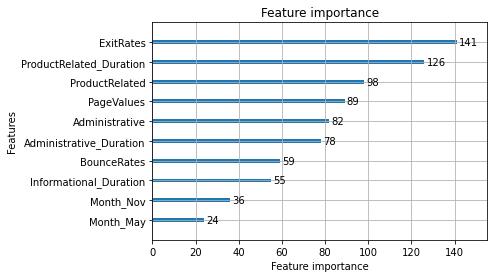

In [71]:
#feature importance for the best tree based model
%matplotlib inline
lgb.plot_importance(clf_encoded,max_num_features=10)

## Conclusion

The top 10 features affecting the buying intentions were identified. These features can be further isolated depending upon the applications. For eg. Exit would be a good measure of how well personalized webpages are working for users. A simple A/B test can be carried out with and without personalization and exit rates as well as other features can be monitored. Change in these features would indicate a change in buying intent and tell us if the test was succesfull. 